# Processed data (wind, solar), demand, deficit, excess

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

label = ['South West', 'Greater London', 'South East']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']
deficit_column_energy = ['SouthWest.Deficit (MWh)','SouthEast.Deficit (MWh)','GreaterLondon.Deficit (MWh)']
cumul_deficit_column_energy = ['SouthWest.CumulDeficit (MWh)','SouthEast.CumulDeficit (MWh)','GreaterLondon.CumulDeficit (MWh)']
excess_column_energy = ['SouthWest.Excess (MWh)','SouthEast.Excess (MWh)','GreaterLondon.Excess (MWh)']
cumul_excess_column_energy = ['SouthWest.CumulExcess (MWh)','SouthEast.CumulExcess (MWh)','GreaterLondon.CumulExcess (MWh)']


df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
    df_proc[deficit_column_energy[i]] = np.maximum(0,df_proc_sheet['Demand MWh']-df_proc_sheet['Solar MWh']-df_proc_sheet['Wind MWh'])
    df_proc[cumul_deficit_column_energy[i]] = df_proc[deficit_column_energy[i]].cumsum()
    df_proc[excess_column_energy[i]] = np.maximum(0,df_proc_sheet['Solar MWh']+df_proc_sheet['Wind MWh']-df_proc_sheet['Demand MWh'])
    df_proc[cumul_excess_column_energy[i]] = df_proc[excess_column_energy[i]].cumsum()

df_proc['t'] = range(0,8760)
df_proc = df_proc.set_index('date')    
    
    
#quarters
quarter1 = {'label': 'first quarter (JFM)', 'plot_pos':0,
          'period':((df_proc.index >= datetime(2020, 1, 1)) & (df_proc.index < datetime(2020, 4, 1)) )}
quarter2 = {'label':'second quarter (AMJ)', 'plot_pos':1,
          'period':((df_proc.index >= datetime(2020, 4, 1)) & (df_proc.index < datetime(2020, 7, 1)))}
quarter3 = {'label':'third quarter (JAS)', 'plot_pos':2,
          'period':((df_proc.index >= datetime(2020, 7, 1)) & (df_proc.index < datetime(2020, 10, 1)) )}
quarter4 = {'label':'fourth quarter (OND)', 'plot_pos':3,
          'period':((df_proc.index >= datetime(2020, 10, 1)) & (df_proc.index <= datetime(2020, 12, 31)))}


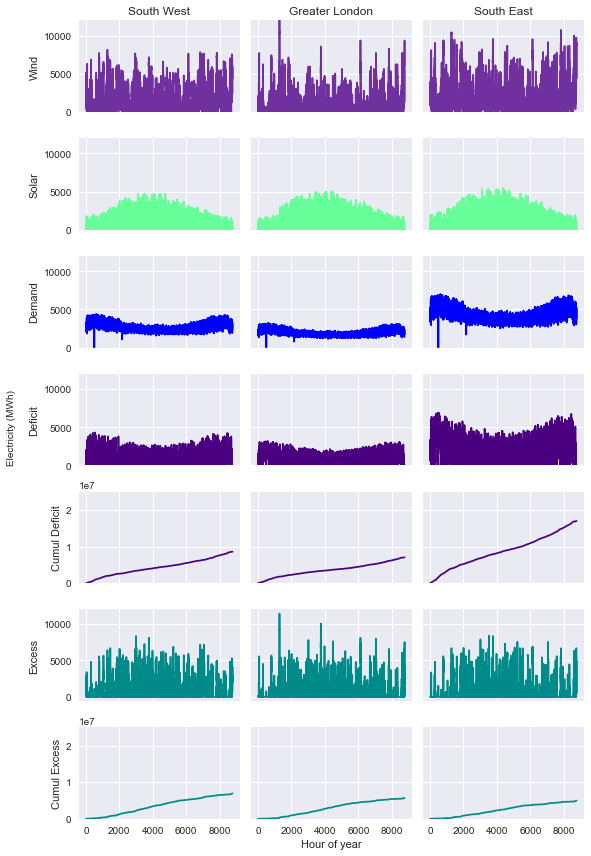

In [2]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(7,3,figsize=(8,12), sharex=True, sharey='row')
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df_proc['t']
    y = df_proc[wind_column_energy[i]]
    axx.set_ylim(0,12000)
    axx.plot(x,y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,12000)
    y = df_proc[solar_column_energy[i]]
    x = df_proc['t']
    axx.plot(x,y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    y = df_proc[demand_column_energy[i]]
    x = df_proc['t']
    axx.plot(x,y,label=label[i],color=demand_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Demand")
for i in [0,1,2]:
    axx = ax[3][i]
    y = df_proc[deficit_column_energy[i]]
    x = df_proc['t']
    axx.plot(x,y,label=label[i],color=deficit_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Deficit")
for i in [0,1,2]:
    axx = ax[4][i]
    y = df_proc[cumul_deficit_column_energy[i]]
    x = df_proc['t']
    axx.plot(x,y,label=label[i],color=deficit_color)
    axx.set_ylim(0,25000000)
    if i == 0:
        axx.set_ylabel("Cumul Deficit")
for i in [0,1,2]:
    axx = ax[5][i]
    x = df_proc['t']
    y = df_proc[excess_column_energy[i]]
    axx.plot(x,y,label=label[i],color=excess_color)
    if i == 0:
        axx.set_ylabel("Excess")
for i in [0,1,2]:
    axx = ax[6][i]
    x = df_proc['t']
    y = df_proc[cumul_excess_column_energy[i]]
    axx.plot(x,y,label=label[i],color=excess_color)
    axx.set_ylim(0,25000000)
    if i == 0:
        axx.set_ylabel("Cumul Excess")
    if i == 1:
        axx.set_xlabel('Hour of year')
    #axx.set_xticks(range(0,8760,500))
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("processed_data_hourly_with_cumlative.png")

# Empirical cumulative distribution functions

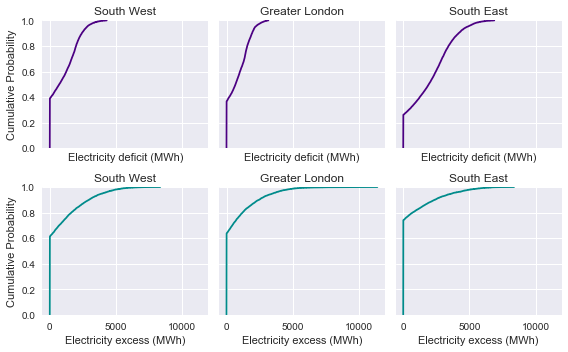

In [3]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,figsize=size33, sharex=True, sharey=True)
for i in [0,1,2]:
    axx = ax[0][i]
    axx.title.set_text(label[i])
    axx.set_xlabel(deficit_label2)
    if i == 0:
        axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df_proc, x=deficit_column_energy[i],color=deficit_color)

mpl.style.use('seaborn')
#Plot daily average
for i in [0,1,2]:
    axx = ax[1][i]
    axx.title.set_text(label[i])
    axx.set_xlabel(excess_label2)
    if i == 0:
        axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df_proc, x=excess_column_energy[i],color=excess_color)
plt.tight_layout()
plt.savefig("excess_deficit_empirical_cumulative_distribution_function.png")

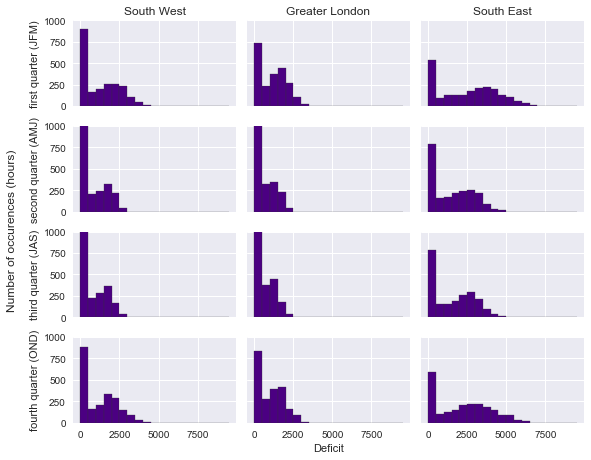

In [4]:
mpl.style.use('seaborn')
fig,ax =  plt.subplots(4,3,figsize=size34,sharex=True,sharey=True)
seasons = [quarter1, quarter2, quarter3, quarter4]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        axx = ax[i][j]
        n, bins, patches = axx.hist(x=df_season[deficit_column_energy[j]],edgecolor="#333333",color=deficit_color,bins=range(0,10000,500),align='mid')
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3 and j == 1:
        ax[i][j].set_xlabel(deficit_label)
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
    if i == 0:
        ax[i][j].title.set_text(label[j])
    ax[i][j].set_ylim(0,1000)
plt.tight_layout()
fig.text(-0.02, 0.5, "Number of occurences (hours)", fontsize="large", va='center', rotation='vertical')
plt.savefig("per_season_energy_deficit_distribution.png", bbox_inches='tight')

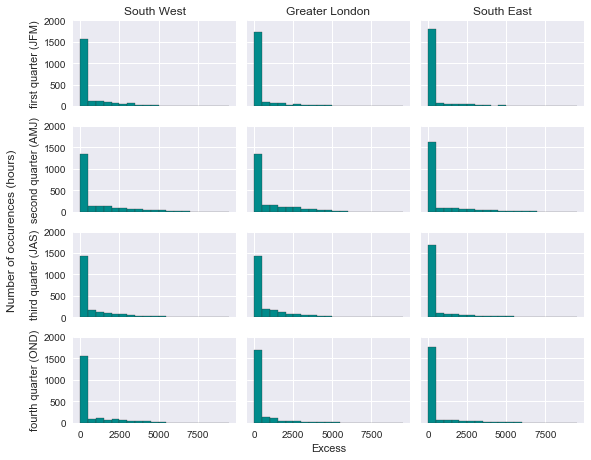

In [5]:
mpl.style.use('seaborn')
fig,ax =  plt.subplots(4,3,figsize=size34,sharex=True,sharey=True)
seasons = [quarter1, quarter2, quarter3, quarter4]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        axx = ax[i][j]
        n, bins, patches = axx.hist(x=df_season[excess_column_energy[j]],edgecolor="#333333",color=excess_color,bins=range(0,10000,500),align='mid')
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3 and j == 1:
        ax[i][j].set_xlabel(excess_label)
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
    if i == 0:
        ax[i][j].title.set_text(label[j])
    ax[i][j].set_ylim(0,2000)
plt.tight_layout()
fig.text(-0.02, 0.5, "Number of occurences (hours)", fontsize="large", va='center', rotation='vertical')
plt.savefig("per_season_energy_excess_distribution.png", bbox_inches='tight')